In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
#Ripasso regressione lineare

In [134]:
data=pd.read_csv("https://git.io/vpaM1",parse_dates=["date"])
data.head(3)

date    demand  temp
0 2015-01-01  1.736065   1.7
1 2015-01-02  1.831672   2.2
2 2015-01-03  1.714934  14.4

In [135]:
data_summer=data.loc[data.date.dt.month.between(6,8)]

In [136]:
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()

In [137]:
lrm.fit(data_summer[["temp"]], data_summer.demand)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [138]:
def mse(model,X,y):
    return np.square(model.predict(X)-y).mean()

In [139]:
def relative_error(model,X,y):
    return np.abs((y-model.predict(X)) / y).mean()

In [140]:
def print_eval(model,X,y):
    print("Mean squared error : {:.5}".format(mse(model,X,y)))
    print("Relative error: {:.5%}".format(relative_error(model,X,y)))
    print("R-squared coefficient: {:.5}".format(model.score(X,y)))

In [141]:
print_eval(lrm,data_summer[["temp"]],data_summer.demand)

Mean squared error : 0.022016
Relative error: 5.68210%
R-squared coefficient: 0.76742


In [142]:
def plot_model(model, x, y):
    #creo il grafico a dispersione dei dati
    plt.scatter(x,y)
    #individuo i limiti del grafico
    xlim=plt.gca().get_xlim()
    ylim=plt.gca().get_ylim()
    #creo un insieme di 100 valori campione di X distribuiti uniformemente sull'asse
    line_x=np.linspace(*xlim,num=100)
    #individuo i corrispondenti valori di Y previsti dal modello
    line_y=model.predict(line_x[:,None])
    #traccio una linea che unisce i punti individuati
    plt.plot(line_x,line_y,c="red",lw=3)
    #reimposto i limiti del grafico a quelli dei dati
    plt.xlim(xlim)
    plt.ylim(ylim)
    

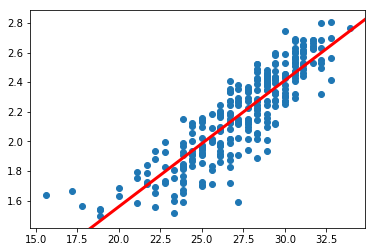

In [143]:
plot_model(lrm,data_summer.temp,data_summer.demand)

In [144]:
#Dividiamo il dataset in traning set e validation set
#creo una serie booleana che indichi quali sono i dati di traning
is_train_data=data.date.dt.year < 2017
#seleziono i dati di training
data_train = data[is_train_data]
#seleziono i dati di validazione (non di training)
data_val=data[~is_train_data]

In [145]:
#Addestro modello lineare solo sui dati di traning
lrm=LinearRegression()
lrm.fit(data_train[["temp"]],data_train.demand)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [146]:
print_eval(lrm,data_val[["temp"]],data_val.demand)

Mean squared error : 0.081474
Relative error: 14.39367%
R-squared coefficient: 0.027955


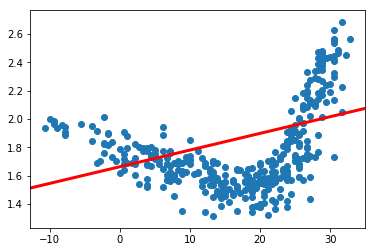

In [147]:
plot_model(lrm,data_val.temp,data_val.demand)

In [148]:
#Regressione polinomiale
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3,include_bias=False)

In [149]:
poly.fit_transform([[10],[-20]])

array([[   10.,   100.,  1000.],
       [  -20.,   400., -8000.]])

In [150]:
poly=PolynomialFeatures(degree=2,include_bias=False)

In [151]:
prm=LinearRegression()
prm.fit(poly.fit_transform(data_train[["temp"]]),data_train.demand)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [152]:
#Consumi predetti a fronte di temperature -5,5,25
prm.predict(poly.transform([[-5],[5],[25]]))

array([2.06073506, 1.60467718, 1.94592852])

In [153]:
print_eval(prm,poly.transform(data_val[["temp"]]),data_val.demand)

Mean squared error : 0.036353
Relative error: 8.77460%
R-squared coefficient: 0.56628


In [154]:
#Risultati molto migliori rispetto a :
print_eval(lrm,data_val[["temp"]],data_val.demand)

Mean squared error : 0.081474
Relative error: 14.39367%
R-squared coefficient: 0.027955


In [156]:
#Costruzione di una pipeline che permette di comporre uno o più filtri con un modello semplice per ottenerne uno composito
#incapsuliamo il modello polinomiale
from sklearn.pipeline import Pipeline
prm= Pipeline({
    #nome elemento
    ("poly",PolynomialFeatures(degree=2,include_bias=False)),
    ("linreg",LinearRegression())
})

In [157]:
#ora la trasformazione dei dati avviene in automatico
prm.fit(data_train[["temp"]],data_train.demand)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('linreg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [158]:
prm.predict([[-5],[5],[25]])

array([2.06073506, 1.60467718, 1.94592852])

In [159]:
print_eval(prm,data_val[["temp"]],data_val.demand)

Mean squared error : 0.036353
Relative error: 8.77460%
R-squared coefficient: 0.56628


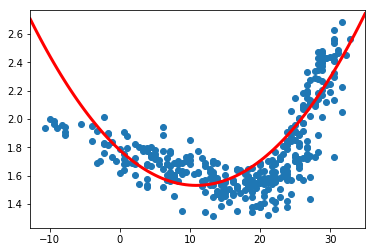

In [160]:
plot_model(prm,data_val.temp,data_val.demand)

In [161]:
#Esercizio 1: Usando gli stessi dati di training e validation testare un modello di terzo grado
#Creando il modello a forma di pipeline, calcolare le misure di accuratezza e visualizzarne il grafico
from sklearn.pipeline import Pipeline 
prm= Pipeline({
    #nome elemento
    ("poly",PolynomialFeatures(degree=3,include_bias=False)),
    ("linreg",LinearRegression())
})
prm.fit(data_train[["temp"]],data_train.demand)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=False, interaction_only=False)), ('linreg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [162]:
print_eval(prm,data_val[["temp"]],data_val.demand)

Mean squared error : 0.024905
Relative error: 6.90076%
R-squared coefficient: 0.70286


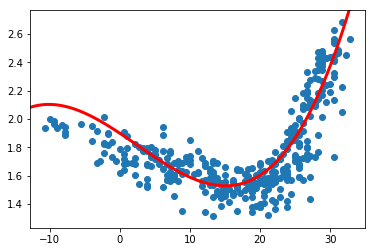

In [163]:
plot_model(prm,data_val.temp,data_val.demand)

In [164]:
#Usando l'istruzione dayofweek entrae il giorno della settimana
#Aggiungere ai dati una colonna che indica per ogni giorno se sia o meno nel weekend
#quindi ripetere le operazioni richieste nell'es 1
data["weekend"]=(data.date.dt.dayofweek>=5)

In [165]:
data_train=data[is_train_data]
data_val=data[~is_train_data]

In [166]:
from sklearn.pipeline import Pipeline
prm=Pipeline([
    ("poly",PolynomialFeatures(degree=3,include_bias=False)),
    ("linreg",LinearRegression())
])
prm.fit(data_train[["temp","weekend"]],data_train.demand)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=False, interaction_only=False)), ('linreg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [167]:
print_eval(prm,data_val[["temp","weekend"]],data_val.demand)

Mean squared error : 0.018874
Relative error: 6.05967%
R-squared coefficient: 0.77482
